# Exercise 7: Plotting climate data in Python

This week we'll put together our data analysis and plotting skills using Pandas and Matplotlib to visualize the temperature data we have been exploring for the course thus far.
For each problem you will create or modify a Python script, then upload your files to GitHub.
The answers to the questions in this week's exercise should be given by modifying the document in places where asked or at the end of this document in the [section titled Answers](#answers).


- **Exercise 7 is due by 16:00 on 27.10.**
- Don't forget to check out [the hints for this week's exercise](https://geo-python.github.io/2017/lessons/L7/exercise-7-hints.html) if you're having trouble.
- Scores on this exercise are out of 20 points.


## Problem 0 - Creating the data file for this week (2 points)

Your first task in this exercise is to write out a file with the contents of the Pandas DataFrame(s) you produced in [Exercise 6](https://github.com/Geo-Python-2017/Exercise-6), Problems 3 and 4.
As described in [Lesson 5](https://geo-python.github.io/2017/lessons/L5/pandas-basic-operations.html#writing-data), data can be saved to a file in Pandas using `dataFrame.to_csv('file.csv, sep=',')`.
Start by creating one data file for the Helsinki temperature data (`helsinki.csv`) and a second for the Sodankylä data (`sodankyla.csv`).


In [15]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import imageio
import glob

In [31]:
# Read file
dataHel = pd.read_csv('data\helsinki.csv', usecols=['YM', 'TAVG_Celsius', 'avgTempsC', 'Diff'])
dataSod = pd.read_csv('data\sodankyla.csv', usecols=['YM', 'TAVG_Celsius', 'avgTempsC', 'Diff'])

In [17]:
print(f'dataHel columns:\n{dataHel.columns}')
print(f'dataSodl columns:\n{dataSod.columns}')

dataHel columns:
Index(['YM', 'TAVG_Celsius', 'avgTempsC', 'Diff'], dtype='object')
dataSodl columns:
Index(['YM', 'TAVG_Celsius', 'avgTempsC', 'Diff'], dtype='object')


In [18]:
print(f'dataHel:\n{dataHel.head()}')
print('\n')
print(f'dataSod:\n{dataSod.head()}')

dataHel:
       YM  TAVG_Celsius  avgTempsC      Diff
0  195201     -1.400966  -5.877342  4.476376
1  195202     -4.000000  -6.990482  2.990482
2  195203    -10.106838  -3.841270 -6.265568
3  195204      4.226190   2.427875  1.798315
4  195205      7.037037   9.522613 -2.485576


dataSod:
       YM  TAVG_Celsius  avgTempsC      Diff
0  195901           NaN -14.645439       NaN
1  195902           NaN -14.055386       NaN
2  195903           NaN  -9.510641       NaN
3  195904           NaN  -3.091635       NaN
4  195905      5.259857   3.865184  1.394673


In [19]:
# Convert column to datetime type
dataHel['YM'] = pd.to_datetime(dataHel['YM'],format='%Y%m')
dataSod['YM'] = pd.to_datetime(dataSod['YM'],format='%Y%m')

# Set datetime index
dataHel= dataHel.set_index('YM')
dataSod= dataSod.set_index('YM')

# Create time index
timeindex = pd.date_range('1953', '2017', freq='AS')

print(timeindex)

DatetimeIndex(['1953-01-01', '1954-01-01', '1955-01-01', '1956-01-01',
               '1957-01-01', '1958-01-01', '1959-01-01', '1960-01-01',
               '1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
      

In [20]:
print(f'dataHel:\n{dataHel.head()}')
print('\n')
print(f'dataSod:\n{dataSod.head()}')
print('\n')
print(dataHel.index.year )

dataHel:
            TAVG_Celsius  avgTempsC      Diff
YM                                           
1952-01-01     -1.400966  -5.877342  4.476376
1952-02-01     -4.000000  -6.990482  2.990482
1952-03-01    -10.106838  -3.841270 -6.265568
1952-04-01      4.226190   2.427875  1.798315
1952-05-01      7.037037   9.522613 -2.485576


dataSod:
            TAVG_Celsius  avgTempsC      Diff
YM                                           
1959-01-01           NaN -14.645439       NaN
1959-02-01           NaN -14.055386       NaN
1959-03-01           NaN  -9.510641       NaN
1959-04-01           NaN  -3.091635       NaN
1959-05-01      5.259857   3.865184  1.394673


Int64Index([1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='YM', length=790)


In [21]:
# Create empty dataframes with datatime index
seasonalDataHel= pd.DataFrame(index=timeindex, columns=['Winter', 'Spring', 'Summer', 'Fall'])
seasonalDataSod= pd.DataFrame(index=timeindex, columns=['Winter', 'Spring', 'Summer', 'Fall'])

# sample of the dataframes
print(seasonalDataHel.head())
print(seasonalDataSod.head())

           Winter Spring Summer Fall
1953-01-01    NaN    NaN    NaN  NaN
1954-01-01    NaN    NaN    NaN  NaN
1955-01-01    NaN    NaN    NaN  NaN
1956-01-01    NaN    NaN    NaN  NaN
1957-01-01    NaN    NaN    NaN  NaN
           Winter Spring Summer Fall
1953-01-01    NaN    NaN    NaN  NaN
1954-01-01    NaN    NaN    NaN  NaN
1955-01-01    NaN    NaN    NaN  NaN
1956-01-01    NaN    NaN    NaN  NaN
1957-01-01    NaN    NaN    NaN  NaN


In [22]:
# Loop seasons and fill empty DataFrame for Helsinki

for i in range(1953,2018):
    winter = dataHel[str(i-1)+'-12':str(i)+'-02'] # variable contains df[str(i)] index str, in this case 'YM'
    spring = dataHel[str(i)+'-03':str(i)+'-05']
    summer = dataHel[str(i)+'-06':str(i)+'-08']
    fall = dataHel[str(i)+'-09':str(i)+'-11']
    # conditions if season contans exact 3 entry rows equivalente to 3 months per season
    if len(winter) == 3:
        seasonalDataHel.loc[str(i)+'-01-01', ['Winter']] = winter['Diff'].mean(skipna=False)
    if len(spring) == 3: 
        seasonalDataHel.loc[str(i)+'-01-01', ['Spring']] = spring['Diff'].mean(skipna=False)
    if len(summer) == 3:   
        seasonalDataHel.loc[str(i)+'-01-01', ['Summer']] = summer['Diff'].mean(skipna=False)
    if len(fall) == 3:
        seasonalDataHel.loc[str(i)+'-01-01', ['Fall']] = fall['Diff'].mean(skipna=False)


In [23]:
# Loop seasons and fill empty DataFrame for Sodankyla
for i in range(1953,2018):
    winter = dataSod[str(i-1)+'-12-01':str(i)+'-02-01']
    spring = dataSod[str(i)+'-03-01':str(i)+'-05-01']
    summer = dataSod[str(i)+'-06-01':str(i)+'-08-01']
    fall = dataSod[str(i)+'-09-01':str(i)+'-11-01']
    if len(winter) == 3:
        seasonalDataSod.loc[str(i)+'-01-01', ['Winter']] = winter['Diff'].mean(skipna=False)
    if len(spring) == 3:    
        seasonalDataSod.loc[str(i)+'-01-01', ['Spring']] = spring['Diff'].mean(skipna=False)
    if len(summer) == 3:   
        seasonalDataSod.loc[str(i)+'-01-01', ['Summer']] = summer['Diff'].mean(skipna=False)
    if len(fall) == 3:   
        seasonalDataSod.loc[str(i)+'-01-01', ['Fall']] = fall['Diff'].mean(skipna=False)

__Change style plots__

In [25]:
plt.style.use('seaborn-whitegrid')

In [26]:
# My folder saving bar-plots
plotFolder= r'CompareBars' 

In [27]:
# Create y-ticks
yticks= np.arange(start=-8, stop=9, step=2)

KeyError: "None of [Int64Index([1959], dtype='int64')] are in the [columns]"

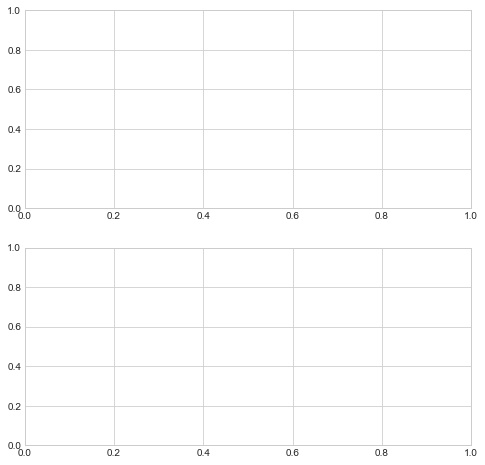

In [28]:
# Create multiple bar-plots using fo LOOP
for i in  range(1959, 2018):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8)) # create subplot canvas
    ax0= axes[0] # 
    ax1= axes[1]
    yearHel= seasonalDataHel[str(i)]
    yearHel.plot(yearHel.index.year, ['Winter', 'Spring', 'Summer', 'Fall'], kind='bar', ax= ax0, color=('blue','magenta', 'green', 'olive'), edgecolor='None', ylim=(8, 8), yticks=yticks)
    ax0.set_title('Weather anomalies in Helsinki')
    ax0.tick_params(axis='x', labeltop=False, labelbottom=False)
    ax0.legend(loc=4, fontsize=12, frameon=False, fancybox=True)
    yearSod= seasonalDataSod[str(i)]
    yearSod.plot(yearSod.index.year, ['Winter', 'Spring', 'Summer', 'Fall'], kind='bar', ax= ax1, color=('blue','magenta', 'green', 'olive'), edgecolor='None', ylim=(8, 8), yticks=yticks)
    ax1.set_title('Weather anomalies in Sodankyla')
    ax1.tick_params(axis='x', labeltop=False, labelbottom=False)
    ax1.legend(loc=4, fontsize=12, frameon=False, fancybox=True)
    fig.add_subplot(111, frameon=False)
    plt.grid('off')
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.ylabel('Difference from long-term seasonal average temperature', size=18, labelpad=-2)
    plt.xlabel(i, size=20, labelpad=-3)
    # Save multiple bar-plots
    filename= 'Bar_'+ str(i)+".png"
    filepath= os.path.join(plotfolder, filename)
    plt.savefig(filepath, dpi=300)
    plt.close()
    

## Problem 1 - Doing time, plotting temperatures (6 points)

In this first problem we'll work with using the datetime format for Pandas data, and creating a line plot of data from a file.
You should:

1. Load the Helsinki temperature data file produced above (`helsinki.csv`) into Pandas
2. Convert the `DATE_m` (or your equivalent date variable) column to the Pandas datetime format.
3. Set the `DATE_m` column as the DataFrame index
4. Make a line plot of temperatures in Celsius from 2010-2017.
    - The line should be a dashed black line with circles for the data points, and include a descriptive title and axis labels.

Save your Python script file as `temperature_plot.py` in GitHub and include a copy of the plot it produces in your answer to Problem 1 below.
More guidance on this problem can be found in [the hints for this week's exercise](https://geo-python.github.io/2017/lessons/L7/exercise-7-hints.html).


## Problem 2 - Seasonal temperature anomalies, visualized (6 points)

![img\Ex7-2.png](img\Ex7-2.png)<br/>
*The goal for this problem is to make this plot.*

For Problem 2, the goal is to recreate the plot above, a 4-panel plot showing seasonal temperature anomalies from 1953-2016.
To do this, you should:

1. Start by creating a new Python script called `anomaly_subplots.py` and performing steps 1-3 from Problem 1 to prepare the data for plotting.
2. Create a yearly Pandas datetime index from 1953-2016 using the `pd.date_range()` function.
3. Create an empty Pandas DataFrame called `seasonalData` using the index you just created and column titles 'Winter', 'Spring', 'Summer', and 'Fall'.
4. Fill the data frame with mean anomaly temperatures (calculated in Exercise 6) for each season in each year.
    - Assume that Winter is December-February, Spring is March-May, Summer is June-August, and Fall is September-November.
5. Create a figure with 4 subplots in the arrangement shown above, labeling axes as needed, with gridlines on, and with a line legend for each panel.
    - You can find tips about these different plot features in the [Matplotlib documentation](https://matplotlib.org/contents.html) and [the hints for this week's exercise](https://geo-python.github.io/2017/lessons/L7/exercise-7-hints.html).

Save your Python script in GitHub and include a copy of the plot it produces in your answer to Problem 2 below.


## Problem 3 - Seasonal temperature anomalies, animated (6 points)

![img/Ex7-2.png](img\Ex7-3.gif)<br/>
*The goal for this problem is to make this kind of animation.*

For Problem 3, the goal is to recreate **65 individual bar plots** that can be animated like the animation above that shows the variation in seasonal temperature anomalies
from 1953-2016.

To do this, you should:

1. Start by creating a new Python script called `anomaly_barplots.py`. You should use the same data as in Problem 2.
2. You should select data for each season of each year between 1953-2017 using the techniques that you have learned during the Lesson 7.
    - Assume that Winter is December-February, Spring is March-May, Summer is June-August, and Fall is September-November.
3. You should calculate the mean temperature of the **weather anomalies** (*outcome from Problem 3 in Exercise 6 last week*) based on the selected data for each season of the year. You should end up having altogether four values for each year (i.e. one for winter, spring, summer, and fall).
4. You should create a bar plot for each year using Pandas (altogether 65 plots) that visualizes the weather anomalies in a similar manner as in the animation above (notice that the y-scale is standardized).
5. Change the aesthetics of your plot: modify the colors of the bars (you can choose the colors yourself), and add a title, X-label (should be the year), and Y-label (you can use the same text as in the animation).
6. You should save each of those plots into an empty folder on your disk
7. (**optional**) After you have saved all those 65 plots into your disk, you can find information from [the hints for this week's exercise](https://geo-python.github.io/2017/lessons/L7/exercise-7-hints.html) on how to create an animation from those plots

Save your Python script in GitHub and include copies of the plots that you created **OR** the animation that was produced from those plots in your answer to Problem 3 below.


# Problem 4 (optional) - Comparing seasonal temperature anomalies, animated

In problem 4, which is an optional task, your aim is to create a similar animation as in Problem 3 but create a 2-panel plot (2 rows, 1 column) where the upper plot
visualizes the weather anomalies from Helsinki, and the lower visualizes the weather anomalies from **Sodankylä** (data from Problem 4 in Exercise 6 last week).

Write your codes into a separate script called `anomaly_bar_subplots.py`, and add your code and the animation to GitHub.